# PREDICTIVE MODELING FOR INSURANCE CLAIM PROBABILITY BASED ON COMPREHENSIVE CAR POLICY FEATURES AND SAFETY RATINGS

### Pipeline

### Problem Statement
Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.



### Data Description

1.	policy_id: The unique identifier for each insurance policy.

2.	policy_tenure: The length of time (in years) that the policy has been active.

3.	age_of_car: The age of the insured car (in years) at the time the policy was taken.

4.	age_of_policyholder: The age of the policyholder (in years) at the time the policy was taken.

5.	area_cluster: A categorical variable representing the cluster or category to which the area of residence belongs.

6.	population_density: A measure of the population density of the area where the policyholder resides.

7.	Make:  The make or manufacturer of the insured car.

8.	segment: The segment or category to which the insured car belongs (e.g., compact, sedan, SUV).

9.	model: The specific model or variant of the insured car.

10.	fuel_type: The type of fuel used by the insured car (e.g., petrol, diesel, electric).

11.	max_torque: The maximum torque output of the car's engine.

12.	max_power: The maximum power output of the car's engine.

13.	engine_type: The type of engine used in the insured car (e.g., inline, V-type).

14.	airbags: The number of airbags installed in the car.

15.	is_esc: A binary variable indicating whether the car has an electronic stability control (ESC) system.

16.	is_adjustable_steering: A binary variable indicating whether the car has adjustable steering.

17.	is_tpms: A binary variable indicating whether the car has a tire pressure monitoring system (TPMS).

18.	is_parking_sensors: A binary variable indicating whether the car has parking sensors.

19.	is_parking_camera: A binary variable indicating whether the car has a parking camera.

20.	rear_brakes_type: The type of rear brakes used in the car.

21.	displacement: The engine displacement of the car (typically measured in liters or cubic centimeters).

22.	cylinder: The number of cylinders in the car's engine.

23.	transmission_type: The type of transmission used in the car (e.g., manual, automatic).

24.	gear_box: The number of gears in the car's gearbox.

25.	steering_type: The type of steering system used in the car.

26.	turning_radius: The minimum radius of the circular path that the car can make.

27.	length: The length of the car.

28.	width: The width of the car.

29.	height: The height of the car.

30.	gross_weight: The gross weight or total weight of the car.

31.	is_front_fog_lights: A binary variable indicating whether the car has front fog lights.

32.	is_rear_window_wiper: A binary variable indicating whether the car has a rear window wiper.

33.	is_rear_window_washer: A binary variable indicating whether the car has a rear window washer.

34.	is_rear_window_defogger: A binary variable indicating whether the car has a rear window defogger.

35.	is_brake_assist: A binary variable indicating whether the car has a brake assist system.

36.	is_power_door_locks: A binary variable indicating whether the car has power door locks.

37.	is_central_locking: A binary variable indicating whether the car has central locking.

38.	is_power_steering: A binary variable indicating whether the car has power steering.

39.	is_driver_seat_height_adjustable: A binary variable indicating whether the driver's seat height is adjustable.

40.	is_day_night_rear_view_mirror: A binary variable indicating whether the car has a day/night rearview mirror

41.	is_ecw: A binary variable indicating whether the car has an electronic crash warning (ECW) system. ECW systems use sensors and algorithms to detect potential collisions and provide warnings to the driver.

42.	is_speed_alert: A binary variable indicating whether the car has a speed alert system. Speed alert systems typically monitor the vehicle's speed and provide warnings or alerts to the driver when they exceed a predetermined speed limit.

43.	ncap_rating: The safety rating of the car according to the New Car Assessment Program (NCAP). NCAP is a government-backed program that evaluates and rates the safety performance of new car models in various crash tests and assessments. The rating is usually represented by a star system, with a higher number of stars indicating a better safety performance.

44.	is_claim: A binary variable indicating whether an insurance claim has been filed for the car policy. This variable determines whether an insurance event has occurred for a given policy, with a value of 1 indicating that a claim was filed and 0 indicating no claim was filed.


### Importing Basic Libraries



In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import RandomizedSearchCV 

from sklearn.utils import resample


from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 


In [2]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

### Load the dataset

In [3]:
data = pd.read_csv("C:\\Users\\Hi\\Capstone Projects\\Data.csv")

In [4]:
## checking the top 5 rows of data

data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


#  Data Preprocessing
### EDA

In [5]:
## shape of data

print("Total no.of rows:",data.shape[0])
print("Total no.of columns:",data.shape[1])

Total no.of rows: 58592
Total no.of columns: 44


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [7]:
data1 = data.copy()

#### Handling Missing Values

In [8]:
print("*******************************")
print("Columns\t\tMissing values")
print("*******************************")
print(data1.isnull().sum())
print("*******************************")
print(data1.isnull().sum().sum())

*******************************
Columns		Missing values
*******************************
policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0


### These is no missing values in this dataset

<Axes: >

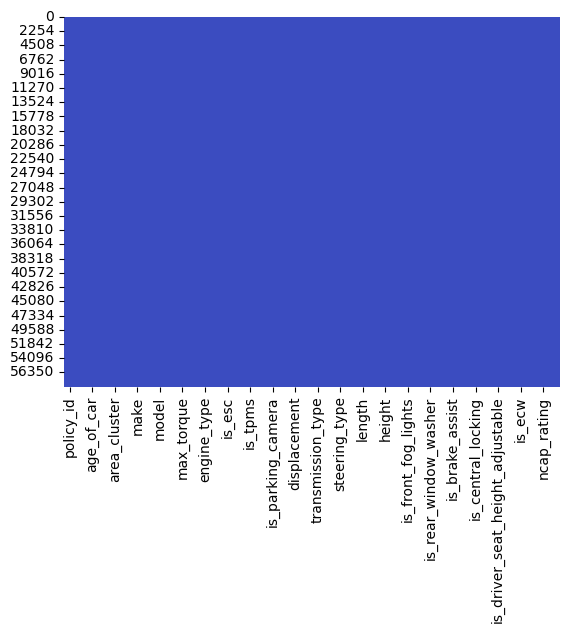

In [9]:
## visual representation for seeing missing values

sns.heatmap(data1.isnull(),cmap = "coolwarm",cbar = False)

### Checking for Outliers

In [10]:
# Let's check the number of outliers per columns

Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

In [11]:
((data1 > UL) | (data1 < LL)).sum()

age_of_car                            269
age_of_policyholder                   221
airbags                                 0
area_cluster                            0
cylinder                                0
displacement                            0
engine_type                             0
fuel_type                               0
gear_box                            14381
gross_weight                            0
height                                  0
is_adjustable_steering                  0
is_brake_assist                         0
is_central_locking                      0
is_claim                             3748
is_day_night_rear_view_mirror           0
is_driver_seat_height_adjustable        0
is_ecw                                  0
is_esc                                  0
is_front_fog_lights                     0
is_parking_camera                       0
is_parking_sensors                      0
is_power_door_locks                     0
is_power_steering                 

In [12]:
# Statistical information

data1.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [13]:
print("************************************************")
print("Columns\t\t\t\t\tdtype")
print("************************************************")
print(data1.dtypes)
print("*************************************************")

************************************************
Columns					dtype
************************************************
policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
disp

In [14]:
## dropping non significant feature
data1 = data1.drop('policy_id',axis = 1)

In [15]:
data1.shape


(58592, 43)

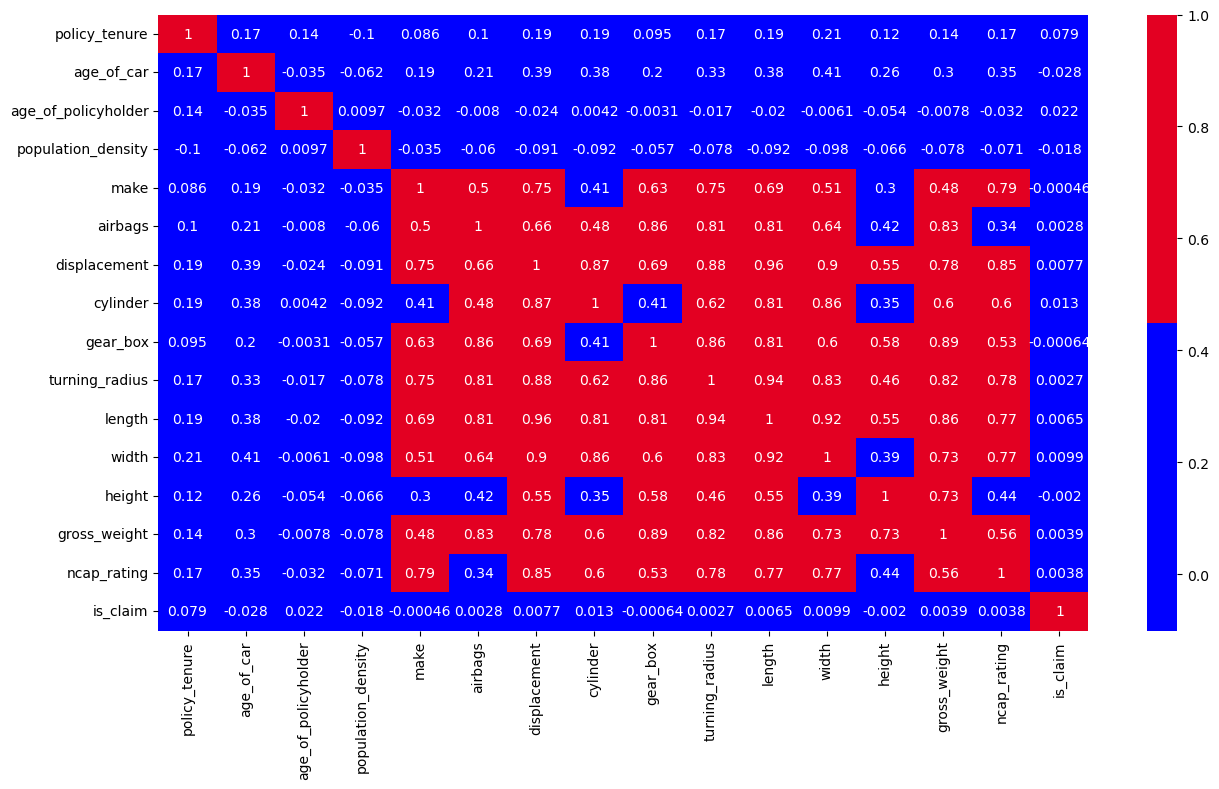

In [16]:
# Correlation part :
colors = ['#0000ff', '#e30022']
plt.figure(figsize=(15,8))
sns.heatmap(data1.corr(), cmap=colors, annot=True);

Text(0.5, 1.0, 'Not claim filed ')

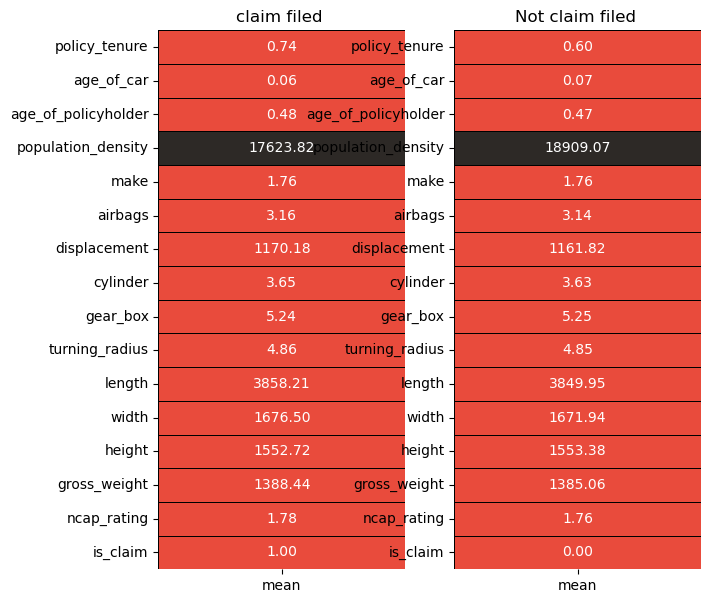

In [17]:
# dark blue = #00008b,dark red =#cc0000, dred merun=#800020,#f0dc82,#e9967a,#560319


colors = ['#E94B3C', '#2D2926']

claim = data1[data1['is_claim']==1].describe().T
no_claim = data1[data1['is_claim']==0].describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,7))
plt.subplot(1,2,1)
sns.heatmap(claim[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')

plt.title('claim filed ')

plt.subplot(1,2,2)
sns.heatmap(no_claim[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')
plt.title('Not claim filed ')

In [18]:
## Getting all different types of features
num_features = [feature for feature in data1.columns if data1[feature].dtype !='O']
print("Number of numerical features:",len(num_features))
cat_features = [feature for feature in data1.columns if data1[feature].dtype =='O']
print("Number of categorical features:",len(cat_features))
discrete_features = [feature for feature in num_features if len(data1[feature].unique()<=10)]
print("Number of Discrete_features:",len(discrete_features))
continous_features = [feature for feature in num_features if feature not in discrete_features]
print("Number of continous_features:",len(continous_features))



Number of numerical features: 16
Number of categorical features: 27
Number of Discrete_features: 16
Number of continous_features: 0


In [19]:
num_features

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim']

In [20]:
cat_features

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

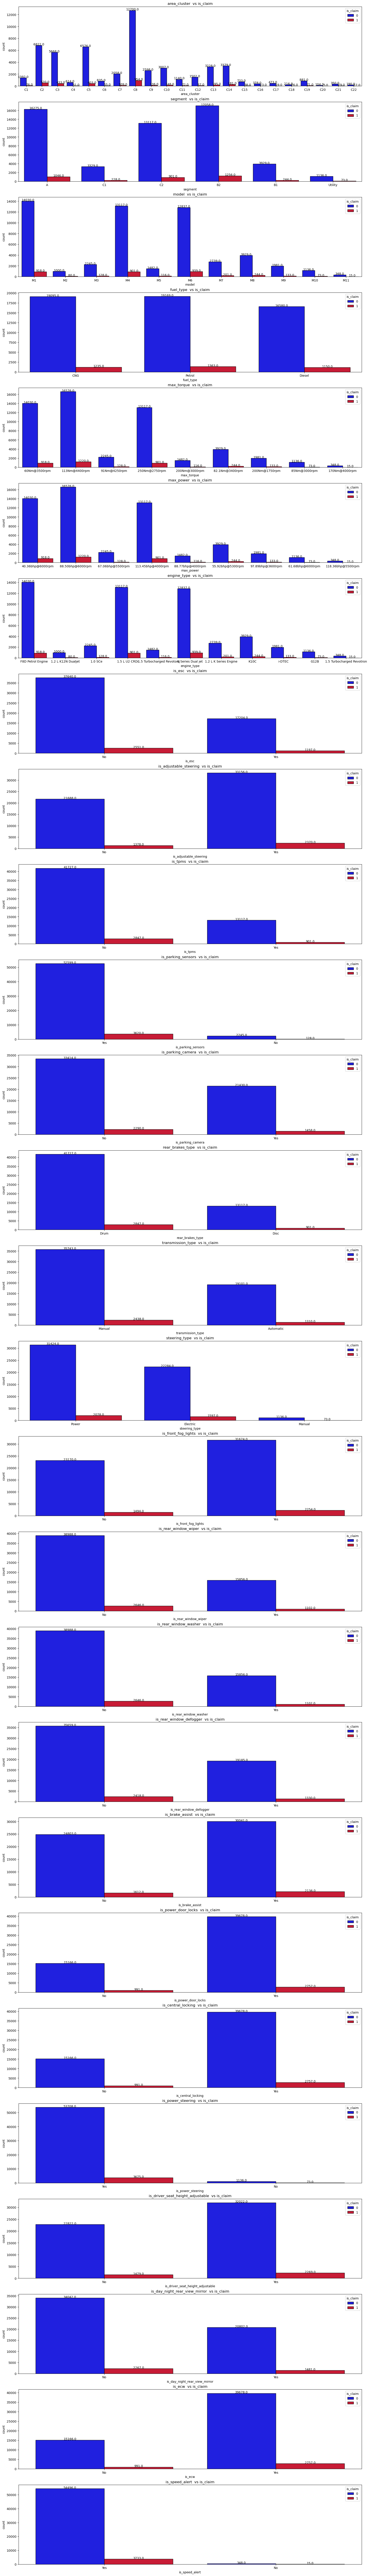

In [21]:
colors = ['#0000ff', '#e30022']
fig  = plt.subplots(nrows=27, ncols=1, figsize=(20,150))
for i in range(len(cat_features)):
    plt.subplot(27,1,i+1)
    ax = sns.countplot(x=cat_features[i], data=data1, hue='is_claim', palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = cat_features[i] + '  vs is_claim'
        plt.title(title);
        
       

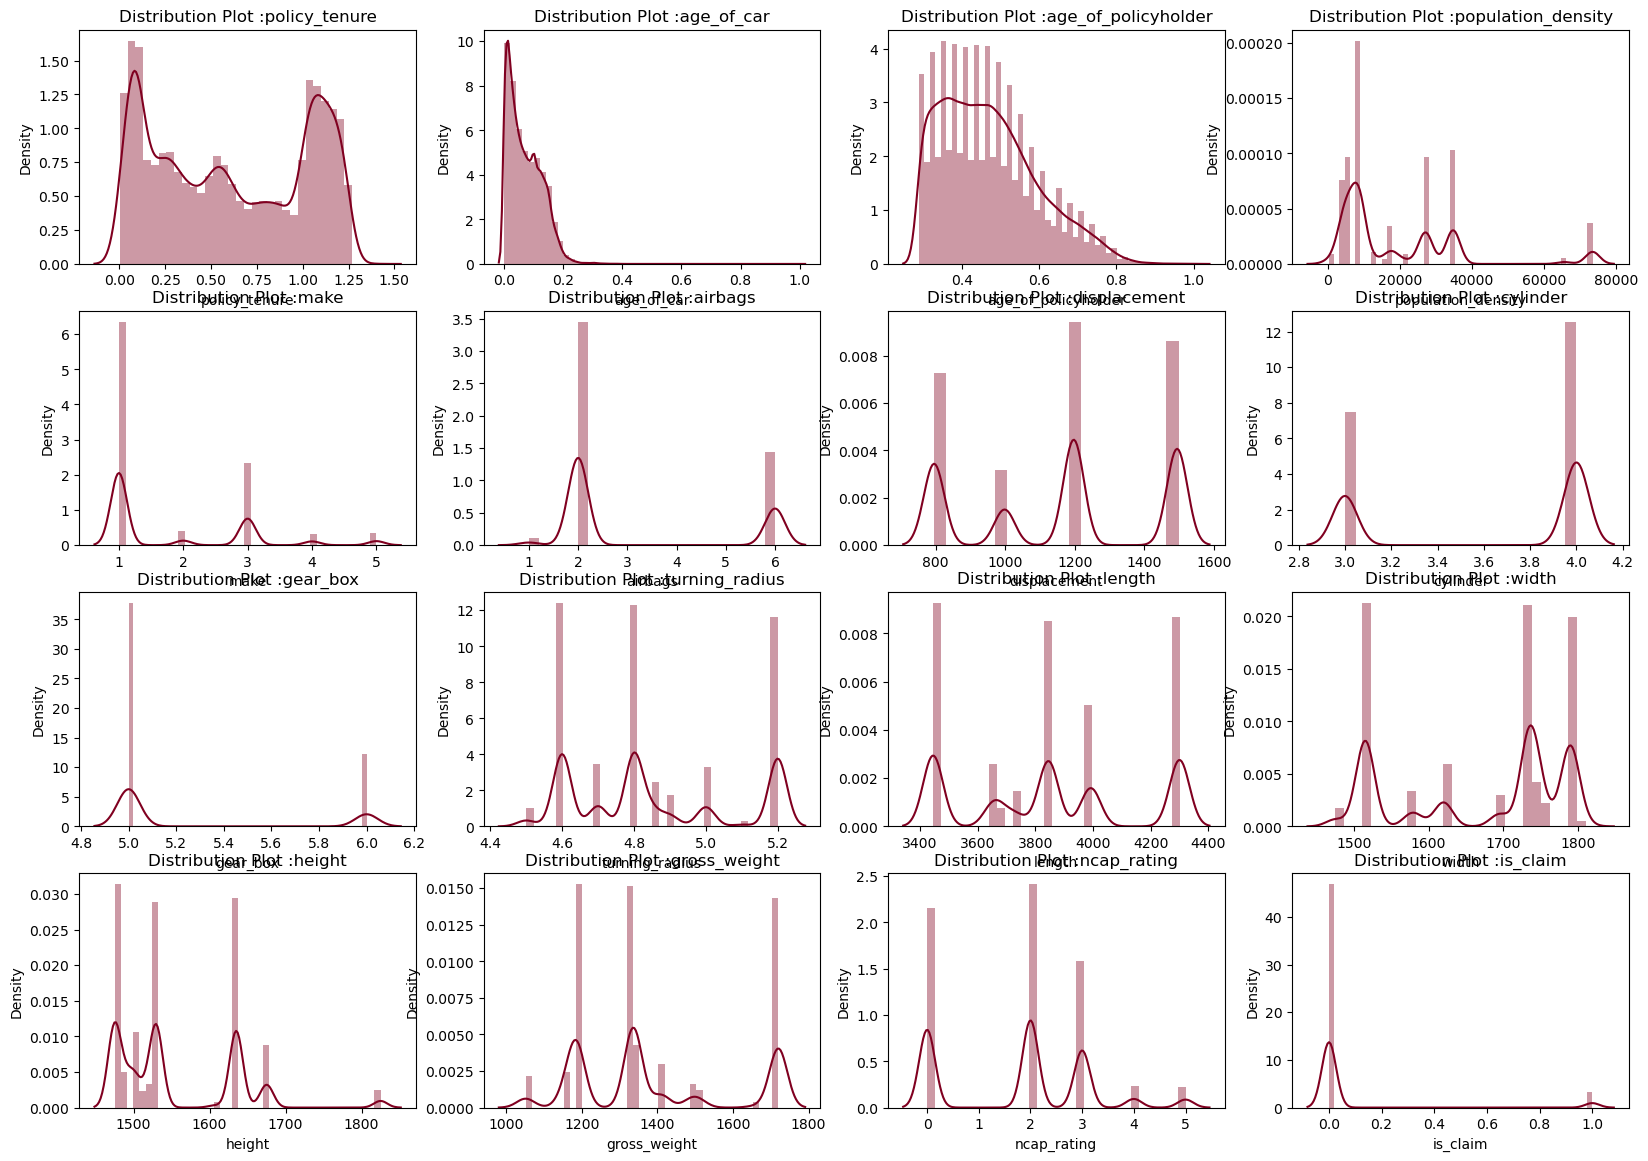

In [22]:
## Distribution of numerical features
colors = ['#800020', '#e9967a']
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20,14))
for i in range(len(num_features)):
    plt.subplot(4,4,i+1)
    sns.distplot(data1[num_features[i]], color= colors[0])
    title = 'Distribution Plot :' + num_features[i]
    plt.title(title)
plt.show()

### Handling categorical variables

In [23]:
## Label Encoding

from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
print("*****************************************************************")
print("\t\tLabel Encoder Transformation")
print("******************************************************************")
for i in cat_features:
    data1[i] = le.fit_transform(data1[i])
    print(i ,":",data1[i].unique(), "=" ,le.inverse_transform(data1[i].unique()))
print("*******************************************************************") 

*****************************************************************
		Label Encoder Transformation
******************************************************************
area_cluster : [ 0 11 15 16 17 18 19 20 21  1  2  3  4  5  6  7  8  9 10 12 13 14] = ['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
segment : [0 3 4 2 1 5] = ['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
model : [ 0  3  4  5  6  7  8  9 10  1  2] = ['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
fuel_type : [0 2 1] = ['CNG' 'Petrol' 'Diesel']
max_torque : [5 0 8 4 3 6 2 7 1] = ['60Nm@3500rpm' '113Nm@4400rpm' '91Nm@4250rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '82.1Nm@3400rpm' '200Nm@1750rpm' '85Nm@3000rpm'
 '170Nm@4000rpm']
max_power : [2 6 5 0 7 3 8 4 1] = ['40.36bhp@6000rpm' '88.50bhp@6000rpm' '67.06bhp@5500rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '55.92bhp@5300rpm'
 '97.89bhp@3600rpm' '61.68bhp@6000rpm' '118.36bhp@5500rpm']
engine_type : [ 6  

In [26]:
data1.head(2)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0


## Feature Engineering

In [27]:
# Chi-Square Test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

In [28]:
data1.loc[:,cat_features]

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,0,0,0,0,5,2,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,11,0,0,0,5,2,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,15,0,0,0,5,2,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,16,3,3,2,0,6,2,1,1,0,...,0,1,1,1,1,1,1,1,1,1
4,17,0,4,2,8,5,0,0,0,0,...,0,0,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,20,0,4,2,8,5,0,0,0,0,...,0,0,0,1,1,1,0,1,1,1
58588,5,0,0,0,5,2,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
58589,17,0,0,0,5,2,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
58590,20,2,7,2,0,6,8,0,1,0,...,0,0,1,1,1,1,1,1,1,1


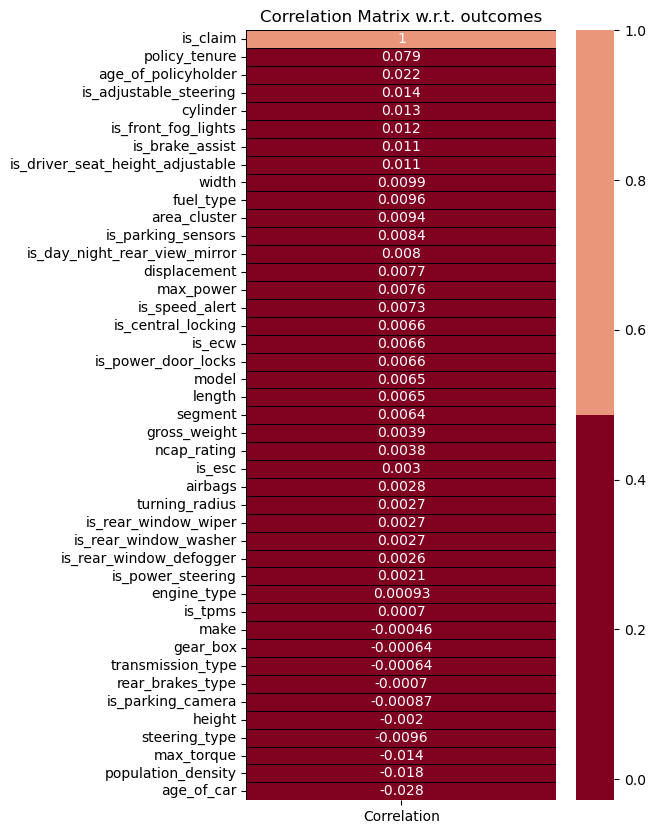

In [29]:
## correlation table diagram


corr = data1.corrwith(data1['is_claim']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,10))
sns.heatmap(corr, annot=True, cmap=colors, linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

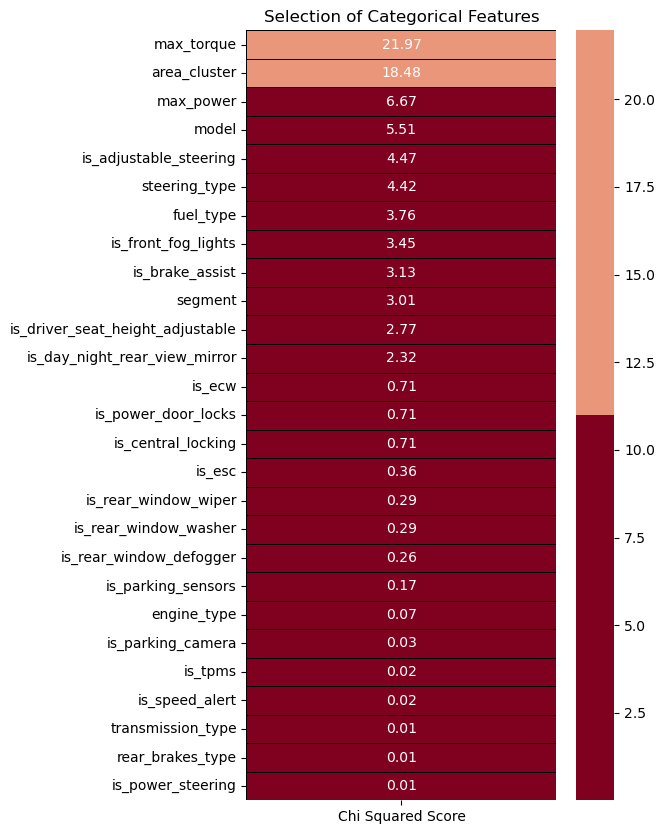

In [30]:
# Chi-Square Test :
features = data1.loc[:,cat_features] # char
target = data1.loc[:,'is_claim'] # cat
best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(cat_features),
                             columns = ['Chi Squared Score'])

plt.subplots(figsize=(5,10))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'),
            annot=True, cmap = colors, linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Categorical Features')
plt.show()

In [31]:
from sklearn.feature_selection import f_classif

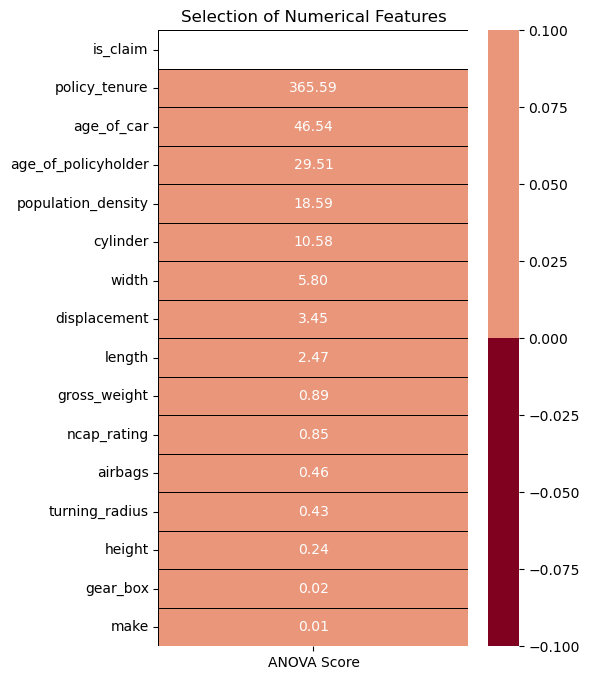

In [32]:
# Anova Testing

features = data1.loc[:,num_features]
target = data1.loc[:,'is_claim']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,8))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = colors, linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

In [33]:
data1.shape

(58592, 43)

In [34]:
data.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

### Drop the non-significant variable

In [35]:


data2 = data1.drop(columns = ['make', 'segment', 'model',
       'fuel_type','max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'], axis =1)
data2.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,max_torque,cylinder,is_claim
0,0.515874,0.05,0.644231,0,4990,5,3,0
1,0.672619,0.02,0.375000,11,27003,5,3,0
2,0.841110,0.02,0.384615,15,4076,5,3,0
3,0.900277,0.11,0.432692,16,21622,0,4,0
4,0.596403,0.11,0.634615,17,34738,8,3,0


In [36]:
data2['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

## Handling Imbalance

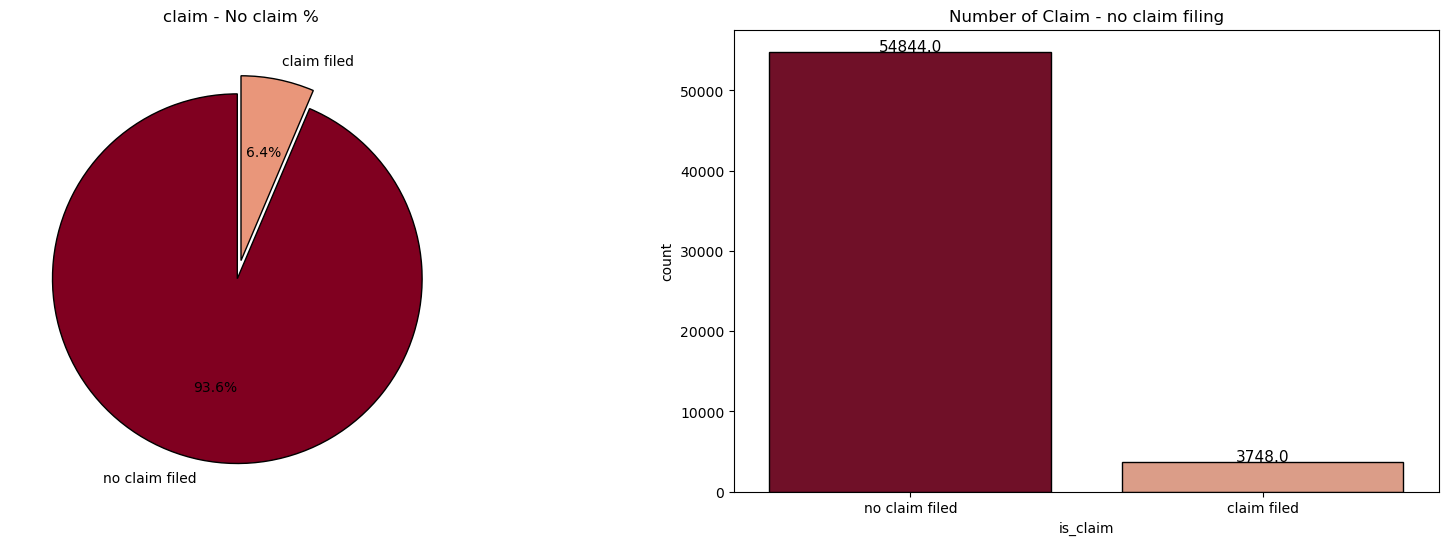

In [37]:
## dependent variabel percentage
colors = ['#800020', '#e9967a']
l = list(data1['is_claim'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
plt.subplot(1,2,1)
plt.pie(circle, labels = ['no claim filed', 'claim filed'], autopct = '%1.1f%%', startangle=90,
        explode = (0.1,0), colors = colors, wedgeprops  = {'edgecolor' : 'black', 
                                                           'linewidth':1, 'antialiased' : True})
plt.title('claim - No claim %');

plt.subplot(1,2,2)

ax = sns.countplot(x='is_claim', data = data2, palette = colors, edgecolor = 'black')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment = 'center', fontsize=11)
ax.set_xticklabels(['no claim filed', 'claim filed'])

plt.title('Number of Claim - no claim filing');
plt.show()    

In [38]:
X = data2.drop(['is_claim'], axis=1)
y = data2['is_claim']

In [39]:
#### Balance the data by using smote technique

import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote,y_smote = smote.fit_resample(X,y)

print("Before SMOTE :" ,y.value_counts())
print()
print("After SMOTE :" ,y_smote.value_counts())


Before SMOTE : 0    54844
1     3748
Name: is_claim, dtype: int64

After SMOTE : 0    54844
1    54844
Name: is_claim, dtype: int64


In [40]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((87750, 7), (21938, 7))

# Scaling

In [41]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

## applying Trnsformation in training(fit_transform)
X_train_sc=sc.fit_transform(X_train)
pd.DataFrame(X_train)

## apply tansformation on test(transform)
X_test_sc=sc.transform(X_test)


### Model Building

In [42]:
models={"Logisitic Regression":LogisticRegression(),
        "SVM":SVC(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier(),
        "Decision Tree":DecisionTreeClassifier(),
        "Adaboost":AdaBoostClassifier(),
        "Gradient Boost":GradientBoostingClassifier(),
        "LGBMClassifier" :LGBMClassifier(),
        "XGBClassifier" :XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_sc, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_sc)
    y_test_pred = model.predict(X_test_sc)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')
    

Logisitic Regression
Model performance for Training set
- Accuracy: 0.5799
- F1 score: 0.5797
- Precision: 0.5782
- Recall: 0.5991
- Roc Auc Score: 0.5798
----------------------------------
Model performance for Test set
- Accuracy: 0.5784
- F1 score: 0.5783
- Precision: 0.5706
- Recall: 0.5952
- Roc Auc Score: 0.5786


SVM
Model performance for Training set
- Accuracy: 0.6480
- F1 score: 0.6409
- Precision: 0.6167
- Recall: 0.7873
- Roc Auc Score: 0.6476
----------------------------------
Model performance for Test set
- Accuracy: 0.6369
- F1 score: 0.6297
- Precision: 0.6027
- Recall: 0.7792
- Roc Auc Score: 0.6385


KNN
Model performance for Training set
- Accuracy: 0.8564
- F1 score: 0.8553
- Precision: 0.8046
- Recall: 0.9425
- Roc Auc Score: 0.8562
----------------------------------
Model performance for Test set
- Accuracy: 0.7863
- F1 score: 0.7838
- Precision: 0.7312
- Recall: 0.8979
- Roc Auc Score: 0.7875


Random Forest
Model performance for Training set
- Accuracy: 1.0000


### Comparing the Accuracy of Different models

In [43]:
list1 = ['Log Reg','SVM','KNN','Decision tree','RF','Adaboost','Gradient Boost','LGBMC','XGBC']
list2 = [57.99,63.69,78.63,91.46,92.25,70.12,89.48,94.96,93.57]


Axes(0.125,0.11;0.775x0.77)


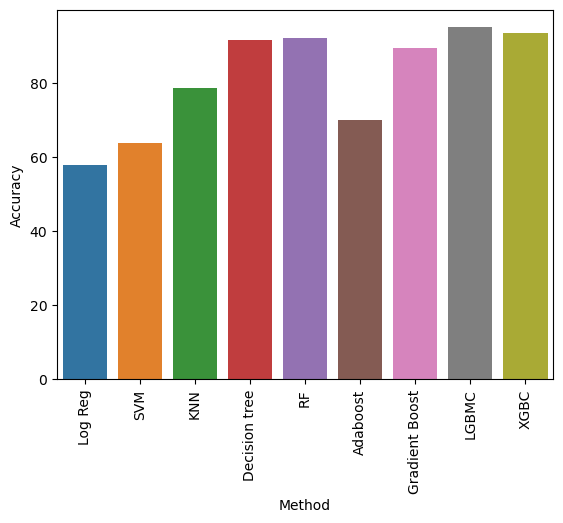

In [44]:
final_accuracy = pd.DataFrame({'Method':list1, "Accuracy":list2})
chart = sns.barplot(x='Method', y='Accuracy', data=final_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [45]:
result_LR = pd.DataFrame({'Accuracy' : 57.99,'Precision':57.06,"Recall ":59.52 ,'F1_Score': 57.83}, index=['Logistic Regression'])
result_SVM = pd.DataFrame({'Accuracy' : 63.69,'Precision':60.27 ,"Recall ":77.92,'F1_Score':62.97}, index=['SVC'])
result_KNN = pd.DataFrame({'Accuracy' : 78.63,'Precision':73.12 ,"Recall ":89.79,'F1_Score':78.38}, index=['KNN Classifier'])
result_DT = pd.DataFrame({'Accuracy' : 91.46,'Precision':90.69,"Recall ":92.19,'F1_Score':91.46},index=['Decision Tree'])
result_RF = pd.DataFrame({'Accuracy' : 92.25,'Precision':92.35 ,"Recall ":91.93,'F1_Score':92.25}, index=['Random Forest'])
result_AB = pd.DataFrame({'Accuracy' : 70.12,'Precision':67.50 ,"Recall ":76.32,'F1_Score':70.02}, index=['AdaboostClassifier'])
result_GB = pd.DataFrame({'Accuracy' : 89.42,'Precision':93.20 ,"Recall ":84.79,'F1_Score':89.39}, index=['Gradient Boosting '])
result_LGBMC = pd.DataFrame({'Accuracy' : 94.96,'Precision':99.70 ,"Recall ":90.08,'F1_Score':94.95}, index=['LGBMClassifier'])
result_XGBC = pd.DataFrame({'Accuracy' : 93.57,'Precision':98.69,"Recall ":93.57,'F1_Score':93.55}, index=['XGBClassifier'])


        
resultDf_final = pd.concat([result_LR,result_SVM,result_KNN,result_DT,result_RF,result_AB,result_GB,result_LGBMC,result_XGBC])
resultDf_final

,Accuracy,Precision,Recall,F1_Score
Logistic Regression,57.99,57.06,59.52,57.83
SVC,63.69,60.27,77.92,62.97
KNN Classifier,78.63,73.12,89.79,78.38
Decision Tree,91.46,90.69,92.19,91.46
Random Forest,92.25,92.35,91.93,92.25
AdaboostClassifier,70.12,67.50,76.32,70.02
Gradient Boosting,89.42,93.20,84.79,89.39
LGBMClassifier,94.96,99.70,90.08,94.95
XGBClassifier,93.57,98.69,93.57,93.55


## Hyperparameter Training

In [46]:
## Hyperparameter Training
lr_params = {"penalty":['l1','l2','elasticnet'],
            "C":[100,10,1.0,0.1,0.01],
            "solver": ['newton_cg','liblinear','sag','saga','lbfgs']}

knn_params={"n_neighbors":[2,5,10,15,20],
            "algorithm": ['auto','ball_tree','kd_tree']}

dt_params ={"criterion":['gini','entropy','log_loss'],
            "splitter":['best','random'],
            "max_depth": [1,2,3,4,5,6],
            "max_features": ['auto','sqrt','log2']}

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [2,3,5, 7, "auto"],
             "min_samples_split": [2,5, 8,10],
             "n_estimators": [5,10,100,150, 200,500]}

Ab_params ={"algorithm": ['SAMME','SAMME.R'],
           "n_estimators": [2,5,10,20,50,100,500, 1000]}

gb_params = {"loss": ['logloss','exponential'],
             "criterion": ['friedman_mse','squared_error'],
             "min_samples_split": [2,4, 8,10, 15],
             "n_estimators": [10,20,50,100, 200, 1000],
             "max_depth":[1,2,3,4,5,6,7],
             "max_features": ['auto','sqrt','log2']}

lgbm_params = {"boosting_type": ['gbdt','dart','rf'],
               "n_estimators": [10,20,50,100, 500, 1000]}


xg_params = {"max_depth": [2,3,4,5, None, 10],
             "n_estimators": [2,5,10,50,100, 500, 1000]}


In [47]:
# Models list for Hyperparameter tuning
randomcv_models = [("Logisitic Regression",LogisticRegression(),lr_params),
#                    ("SVM",SVC(),svm_params),
                   ("KNN",KNeighborsClassifier(),knn_params),
                   ( "RF", RandomForestClassifier(), rf_params),
                   ( "Decision Tree",DecisionTreeClassifier(),dt_params),
                   ("Adaboost",AdaBoostClassifier(),Ab_params),
                   ("Gradient Boost",GradientBoostingClassifier(),gb_params),
                   ("LGBMClassifier" ,XGBClassifier(),lgbm_params),
                   ("XGBClassifier" ,XGBClassifier(),xg_params)
                  ]

In [48]:
randomcv_models

[('Logisitic Regression',
  LogisticRegression(),
  {'penalty': ['l1', 'l2', 'elasticnet'],
   'C': [100, 10, 1.0, 0.1, 0.01],
   'solver': ['newton_cg', 'liblinear', 'sag', 'saga', 'lbfgs']}),
 ('KNN',
  KNeighborsClassifier(),
  {'n_neighbors': [2, 5, 10, 15, 20],
   'algorithm': ['auto', 'ball_tree', 'kd_tree']}),
 ('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [2, 3, 5, 7, 'auto'],
   'min_samples_split': [2, 5, 8, 10],
   'n_estimators': [5, 10, 100, 150, 200, 500]}),
 ('Decision Tree',
  DecisionTreeClassifier(),
  {'criterion': ['gini', 'entropy', 'log_loss'],
   'splitter': ['best', 'random'],
   'max_depth': [1, 2, 3, 4, 5, 6],
   'max_features': ['auto', 'sqrt', 'log2']}),
 ('Adaboost',
  AdaBoostClassifier(),
  {'algorithm': ['SAMME', 'SAMME.R'],
   'n_estimators': [2, 5, 10, 20, 50, 100, 500, 1000]}),
 ('Gradient Boost',
  GradientBoostingClassifier(),
  {'loss': ['logloss', 'exponential'],
   'criterion': ['friedman_mse', 'squar

In [49]:
# Hyper parameter tuning with Randomized SearchCV

from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train_sc, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print()
    print(model_param[model_name])
    print()

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 42 candidates, totalling 126 fits
---------------- Best Params for Logisitic Regression -------------------

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}

---------------- Best Params for KNN -------------------

{'n_neighbors': 2, 'algorithm': 'auto'}

---------------- Best Params for RF -------------------

{'n_estimators': 150, 'min_samples_split': 8, 'max_features': 7, 'max_depth': None}

---------------- Best Params for Decision Tree -------------------

{'splitter': 'best', 'max_features': 'sqrt', 'max_depth': 5, 'crite

In [63]:
models_ = {"Logisitic Regression":LogisticRegression(solver= 'liblinear', penalty = 'l1', C = 0.01),
         "Random Forest":RandomForestClassifier(n_estimators= 150, min_samples_split= 8, max_features= 7, max_depth= None),
        "Decision Tree":DecisionTreeClassifier(splitter= 'best', max_features= 'sqrt', max_depth= 5, criterion= 'gini'),
        "Adaboost":AdaBoostClassifier(n_estimators= 1000, algorithm= 'SAMME.R'),
        "Gradient Boost":GradientBoostingClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 'sqrt',
                                                    max_depth= 7, loss= 'exponential', criterion= 'squared_error'),
        "LGBMClassifier" :LGBMClassifier(n_estimators= 500, boosting_type= 'gbdt'),
        "XGBClassifier":XGBClassifier(n_estimators = 100, max_depth = 10)
                                         }
                                               
for i in range(len(list(models_))):
    model = list(models_.values())[i]
    model.fit(X_train_sc, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_sc)
    y_test_pred = model.predict(X_test_sc)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models_.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.5802
- F1 score: 0.5801
- Precision: 0.5789
- Recall: 0.5970
- Roc Auc Score: 0.5802
----------------------------------
Model performance for Test set
- Accuracy: 0.5786
- F1 score: 0.5786
- Precision: 0.5711
- Recall: 0.5928
- Roc Auc Score: 0.5788


Random Forest
Model performance for Training set
- Accuracy: 0.9785
- F1 score: 0.9784
- Precision: 0.9956
- Recall: 0.9612
- Roc Auc Score: 0.9785
----------------------------------
Model performance for Test set
- Accuracy: 0.9449
- F1 score: 0.9449
- Precision: 0.9701
- Recall: 0.9168
- Roc Auc Score: 0.9446


Decision Tree
Model performance for Training set
- Accuracy: 0.5723
- F1 score: 0.5601
- Precision: 0.5553
- Recall: 0.7377
- Roc Auc Score: 0.5718
----------------------------------
Model performance for Test set
- Accuracy: 0.5645
- F1 score: 0.5521
- Precision: 0.5442
- Recall: 0.7335
- Roc Auc Score: 0.5664


Adaboost
Model performance for Training set
- Ac

## Model Performence after hyperparameter tuning

In [64]:
result_LR_1 = pd.DataFrame({'Accuracy' : 57.86,'Precision':57.11 ,"Recall ":59.28,'F1_Score': 57.86}, index=['Logistic Regression'])
result_DT_1 = pd.DataFrame({'Accuracy' : 56.45,'Precision':54.42,"Recall ":73.35,'F1_Score':52.21}, index=['Decision Tree'])
result_RF_1 = pd.DataFrame({'Accuracy' : 92.36,'Precision':92.29 ,"Recall ":92.26,'F1_Score':91.36}, index=['Random Forest'])
result_AB_1 = pd.DataFrame({'Accuracy' : 89.90,'Precision':95.08 ,"Recall ":83.92,'F1_Score':89.96}, index=['AdaboostClassifier'])
result_GB_1 = pd.DataFrame({'Accuracy' : 96.08,'Precision':99.14 ,"Recall ":92.86,'F1_Score':96.07}, index=['Gradient Boosting '])
result_LGBMC_1 = pd.DataFrame({'Accuracy' : 95.96,'Precision':99.68 ,"Recall ":92.12,'F1_Score':95.95}, index=['LGBMClassifier'])
result_XGBC_1 = pd.DataFrame({'Accuracy' : 94.20,'Precision': 98.11,"Recall ":90.01,'F1_Score':94.19}, index=['XGBClassifier'])



resultDf_final_1 = pd.concat([result_LR_1,result_DT_1,result_RF_1,result_AB_1,result_GB_1,result_LGBMC_1,result_XGBC_1])

resultDf_final_1

,Accuracy,Precision,Recall,F1_Score
Logistic Regression,57.86,57.11,59.28,57.86
Decision Tree,56.45,54.42,73.35,52.21
Random Forest,92.36,92.29,92.26,91.36
AdaboostClassifier,89.90,95.08,83.92,89.96
Gradient Boosting,96.08,99.14,92.86,96.07
LGBMClassifier,95.96,99.68,92.12,95.95
XGBClassifier,94.20,98.11,90.01,94.19


In [65]:
list1_HT = ['Log Reg','Decision tree','RF','Adaboost','Gradient Boost','LGBMC','XGBC']
list2_HT = [57.86,56.45,92.36,89.90,96.08,95.96,94.20]


Axes(0.125,0.11;0.775x0.77)


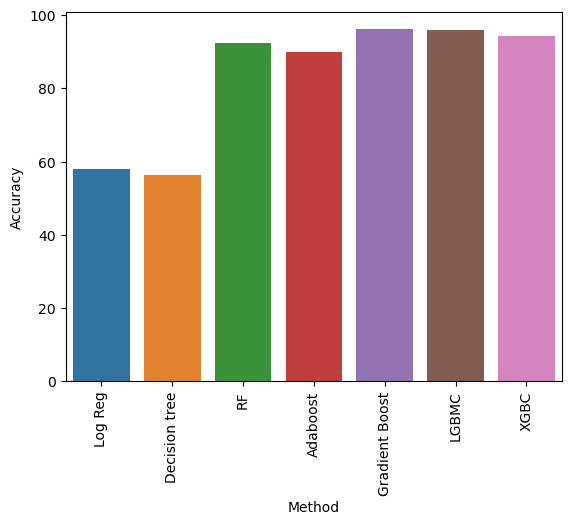

In [66]:
final_accuracy = pd.DataFrame({'Method':list1_HT, "Accuracy":list2_HT})
chart = sns.barplot(x='Method', y='Accuracy', data=final_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

### CONCLUSION